In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder

df = pd.read_csv("FoodPrice_in_Turkey.csv", encoding = "UTF-8")
df

,Place,ProductId,ProductName,UmId,UmName,Month,Year,Price
0,National Average,52,Rice - Retail,5,KG,5,2013,4.4920
1,National Average,52,Rice - Retail,5,KG,6,2013,4.5786
2,National Average,52,Rice - Retail,5,KG,11,2013,4.7865
3,National Average,52,Rice - Retail,5,KG,12,2013,5.1337
4,National Average,52,Rice - Retail,5,KG,1,2014,5.5099
...,...,...,...,...,...,...,...,...
7376,Izmir,502,Cocoa (powder) - Retail,5,KG,8,2019,47.9040
7377,Izmir,502,Cocoa (powder) - Retail,5,KG,9,2019,49.1176
7378,Izmir,502,Cocoa (powder) - Retail,5,KG,10,2019,50.8347
7379,Izmir,502,Cocoa (powder) - Retail,5,KG,11,2019,51.7985


In [4]:
df.shape

(7381, 8)

In [5]:
df.head()

,Place,ProductId,ProductName,UmId,UmName,Month,Year,Price
0,National Average,52,Rice - Retail,5,KG,5,2013,4.4920
1,National Average,52,Rice - Retail,5,KG,6,2013,4.5786
2,National Average,52,Rice - Retail,5,KG,11,2013,4.7865
3,National Average,52,Rice - Retail,5,KG,12,2013,5.1337
4,National Average,52,Rice - Retail,5,KG,1,2014,5.5099


In [6]:
df.describe()

,ProductId,UmId,Month,Year,Price
count,7381.000000,7381.000000,7381.000000,7381.000000,7381.000000
mean,254.509687,15.252811,6.479881,2017.458474,15.738709
std,141.008599,25.276665,3.530361,1.499256,22.418284
min,52.000000,5.000000,1.000000,2013.000000,0.253900
25%,114.000000,5.000000,3.000000,2017.000000,3.223600
50%,239.000000,5.000000,6.000000,2018.000000,5.909600
75%,388.000000,5.000000,10.000000,2019.000000,20.441900
max,502.000000,102.000000,12.000000,2019.000000,159.445800


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7381 entries, 0 to 7380
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Place        7381 non-null   object 
 1   ProductId    7381 non-null   int64  
 2   ProductName  7381 non-null   object 
 3   UmId         7381 non-null   int64  
 4   UmName       7381 non-null   object 
 5   Month        7381 non-null   int64  
 6   Year         7381 non-null   int64  
 7   Price        7381 non-null   float64
dtypes: float64(1), int64(4), object(3)
memory usage: 461.4+ KB


In [8]:
df.isna()

,Place,ProductId,ProductName,UmId,UmName,Month,Year,Price
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
7376,False,False,False,False,False,False,False,False
7377,False,False,False,False,False,False,False,False
7378,False,False,False,False,False,False,False,False
7379,False,False,False,False,False,False,False,False


In [9]:
df.notna()

,Place,ProductId,ProductName,UmId,UmName,Month,Year,Price
0,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...
7376,True,True,True,True,True,True,True,True
7377,True,True,True,True,True,True,True,True
7378,True,True,True,True,True,True,True,True
7379,True,True,True,True,True,True,True,True


In [10]:
df1 = df.dropna()

In [11]:
df1.shape

(7381, 8)

<AxesSubplot: xlabel='Price'>

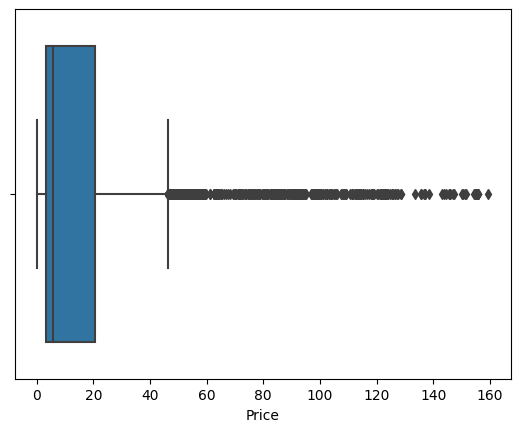

In [12]:
sns.boxplot(x = df1["Price"])

In [13]:
Q1 = df1["Price"].quantile(0.25)
Q3 = df1["Price"].quantile(0.75)
IQR = Q3-Q1

In [14]:
df2 = df1
df2["outlier"] = ~((df1["Price"]< (Q1 - 1.5*IQR))|(df1["Price"]> (Q3 + 1.5*IQR)))

In [15]:
df2 = df2[df2["outlier"]==True]

<AxesSubplot: xlabel='Price'>

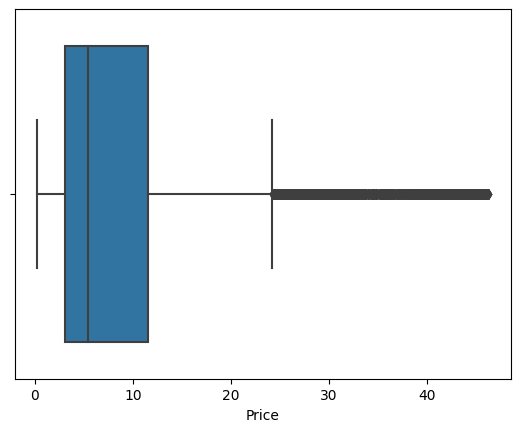

In [16]:
sns.boxplot(x = df2["Price"])

In [17]:
df2['Price'].describe()

count    6784.000000
mean       10.503617
std        11.661447
min         0.253900
25%         3.079550
50%         5.373350
75%        11.541925
max        46.251900
Name: Price, dtype: float64

<AxesSubplot: xlabel='Price', ylabel='Density'>

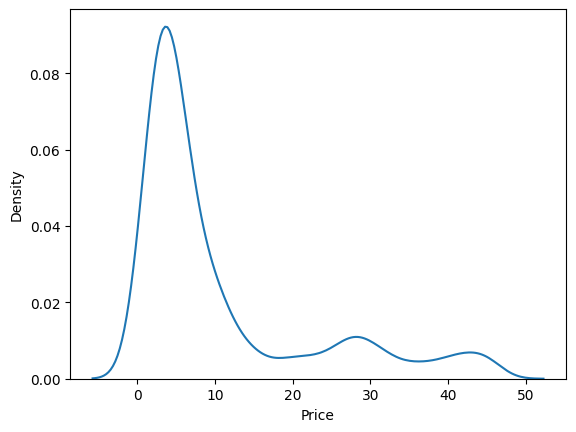

In [18]:
sns.kdeplot(data=df2["Price"])

In [19]:
scaler = MinMaxScaler()

In [21]:
df_s = scaler.fit_transform(df2[['Price']])

In [23]:
pd.DataFrame(df_s).describe()

,0
count,6784.000000
mean,0.222830
std,0.253521
min,0.000000
25%,0.061430
50%,0.111297
75%,0.245403
max,1.000000


<AxesSubplot: >

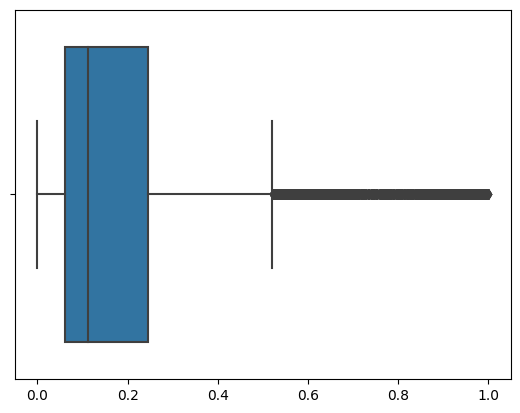

In [24]:
sns.boxplot(x = df_s)

<AxesSubplot: ylabel='Density'>

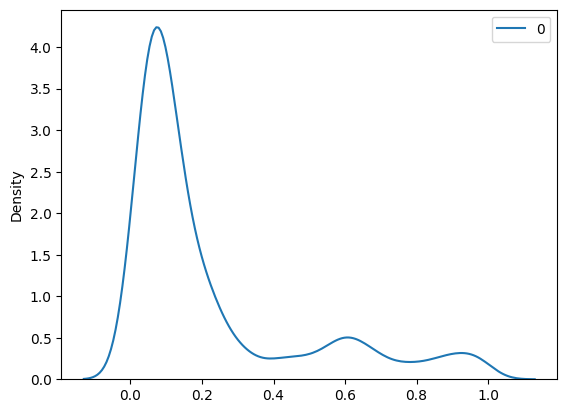

In [25]:
sns.kdeplot(data=df_s)

In [26]:
scaler = RobustScaler()

In [27]:
df_s = scaler.fit_transform(df2[["Price"]])

In [29]:
pd.DataFrame(df_s).describe()

,0
count,6.784000e+03
mean,6.062443e-01
std,1.378035e+00
min,-6.049661e-01
25%,-2.710587e-01
50%,-5.247539e-17
75%,7.289413e-01
max,4.830624e+00


<AxesSubplot: >

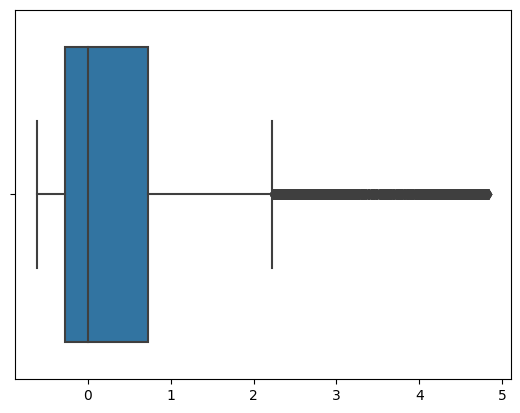

In [30]:
sns.boxplot(x = df_s)

<AxesSubplot: ylabel='Density'>

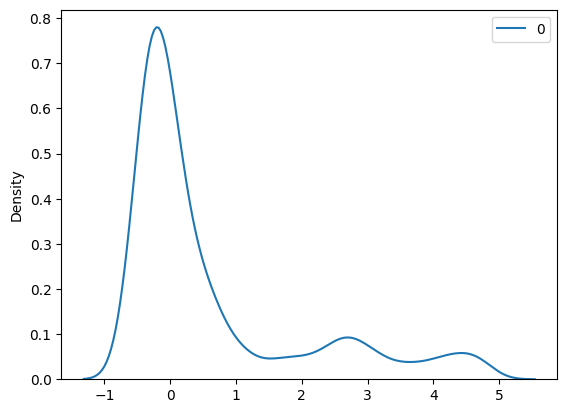

In [31]:
sns.kdeplot(data=df_s)

In [32]:
scaler = StandardScaler()

In [33]:
df_s = scaler.fit_transform(df2[["Price"]])

In [34]:
pd.DataFrame(df_s).describe()

,0
count,6.784000e+03
mean,-1.984786e-16
std,1.000074e+00
min,-8.790052e-01
25%,-6.366803e-01
50%,-4.399664e-01
75%,8.904423e-02
max,3.065736e+00


<AxesSubplot: >

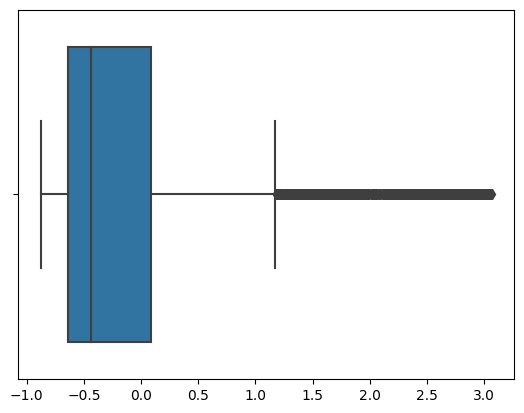

In [35]:
sns.boxplot(x=df_s)

<AxesSubplot: ylabel='Density'>

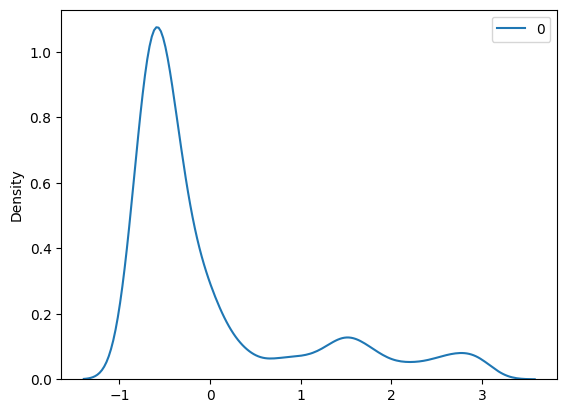

In [36]:
sns.kdeplot(data=df_s)

In [37]:
df2["ProductName"].unique()

array(['Rice - Retail', 'Wheat flour - Retail', 'Beans (white) - Retail',
       'Potatoes - Retail', 'Eggs - Retail', 'Meat (chicken) - Retail',
       'Sugar - Retail', 'Garlic - Retail', 'Lentils - Retail',
       'Pasta - Retail', 'Tomatoes - Retail',
       'Groundnuts (shelled) - Retail', 'Bread (common) - Retail',
       'Coffee - Retail', 'Onions - Retail', 'Tea (green) - Retail',
       'Cabbage - Retail', 'Meat (mutton) - Retail',
       'Oil (sunflower) - Retail', 'Salt - Retail',
       'Coffee (instant) - Retail', 'Peas (green, dry) - Retail',
       'Apples (red) - Retail', 'Cauliflower - Retail',
       'Cucumbers (greenhouse) - Retail', 'Oil (olive) - Retail',
       'Chickpeas - Retail', 'Bananas - Retail', 'Bulgur - Retail',
       'Tea - Retail', 'Fuel (petrol-gasoline) - Retail',
       'Transport (public) - Retail', 'Tomatoes (paste) - Retail',
       'Fuel (gas) - Retail', 'Apples - Retail', 'Oranges - Retail',
       'Yogurt - Retail', 'Bread (pita) - Retail', 'C

In [38]:
encoder = OneHotEncoder()

In [39]:
encoded_data = encoder.fit_transform(np.asarray(df2["ProductName"]).reshape(-1,1))
encoded_data.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [40]:
pd.get_dummies(df2["ProductName"])

,Apples (red) - Retail,Apples - Retail,Bananas - Retail,Beans (white) - Retail,Bread (common) - Retail,Bread (pita) - Retail,Bulgur - Retail,Cabbage - Retail,Cauliflower - Retail,Cheese - Retail,...,Tea (herbal) - Retail,Tea - Retail,Tomatoes (paste) - Retail,Tomatoes - Retail,Transport (public) - Retail,"Wage (non-qualified labour, non-agricultural) - Retail",Water - Retail,Wheat flour - Retail,Yogurt - Retail,Zucchini - Retail
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7370,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7371,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7372,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
encoder = LabelEncoder()

In [42]:
encoded_data = encoder.fit_transform(np.asarray(df2["ProductName"]))
encoded_data

array([36, 36, 36, ..., 11, 11, 11])

In [43]:
df2["ProductName"].astype("category").cat.codes

0       36
1       36
2       36
3       36
4       36
        ..
7369    11
7370    11
7371    11
7372    11
7373    11
Length: 6784, dtype: int8

In [44]:
df2.head()

,Place,ProductId,ProductName,UmId,UmName,Month,Year,Price,outlier
0,National Average,52,Rice - Retail,5,KG,5,2013,4.4920,True
1,National Average,52,Rice - Retail,5,KG,6,2013,4.5786,True
2,National Average,52,Rice - Retail,5,KG,11,2013,4.7865,True
3,National Average,52,Rice - Retail,5,KG,12,2013,5.1337,True
4,National Average,52,Rice - Retail,5,KG,1,2014,5.5099,True


In [45]:
cats = pd.cut(df2['Price'],5)
cats

0         (0.208, 9.454]
1         (0.208, 9.454]
2         (0.208, 9.454]
3         (0.208, 9.454]
4         (0.208, 9.454]
              ...       
7369    (37.052, 46.252]
7370    (37.052, 46.252]
7371    (37.052, 46.252]
7372    (37.052, 46.252]
7373    (37.052, 46.252]
Name: Price, Length: 6784, dtype: category
Categories (5, interval[float64, right]): [(0.208, 9.454] < (9.454, 18.653] < (18.653, 27.853] < (27.853, 37.052] < (37.052, 46.252]]

In [47]:
pd.value_counts(cats)

(0.208, 9.454]      4711
(9.454, 18.653]      743
(18.653, 27.853]     474
(27.853, 37.052]     449
(37.052, 46.252]     407
Name: Price, dtype: int64

In [48]:
cats = pd.qcut(df2["Price"],5)
cats

0          (4.315, 6.81]
1          (4.315, 6.81]
2          (4.315, 6.81]
3          (4.315, 6.81]
4          (4.315, 6.81]
              ...       
7369    (17.637, 46.252]
7370    (17.637, 46.252]
7371    (17.637, 46.252]
7372    (17.637, 46.252]
7373    (17.637, 46.252]
Name: Price, Length: 6784, dtype: category
Categories (5, interval[float64, right]): [(0.253, 2.694] < (2.694, 4.315] < (4.315, 6.81] < (6.81, 17.637] < (17.637, 46.252]]

In [49]:
pd.value_counts(cats)

(0.253, 2.694]      1358
(4.315, 6.81]       1357
(17.637, 46.252]    1357
(2.694, 4.315]      1356
(6.81, 17.637]      1356
Name: Price, dtype: int64